### Генерируем список дат, для подстановки в УРЛ

In [3]:
from datetime import date
from dateutil.rrule import rrule, DAILY
import datetime

a = date(2017,01, 01)
b = datetime.datetime.today()

date_list=[]
for dt in rrule(DAILY, dtstart=a, until=b):
    date_list += [dt.strftime("%Y-%m-%d")]

#date_list

In [4]:
date_list[0]

'2017-01-01'

### URL

In [21]:
URL_firstPart='http://m.football.ua/default.aspx?menu_id=football_pda_news&dt='

In [29]:
full_urls = []
for date in date_list:
    full_urls += [URL_firstPart+date]

In [5]:
import requests
import bs4
import re
import datetime
import time 

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### тестируем запрос на одной дате

In [6]:
full_url='http://m.football.ua/default.aspx?menu_id=football_pda_news&dt='+ date_list[0]
page_data = requests.get(full_url)
source = bs4.BeautifulSoup(page_data.content, 'html.parser')
links = source.find_all(href=re.compile("http://m.football.ua/news/"))
articles={}
for link in links:        
    aticle_time = link.previous_sibling.previous_sibling.previous_sibling.string
    #print(datetime.datetime.combine(datetime.datetime.strptime(date_list[0], "%Y-%m-%d").date(), datetime.datetime.strptime(aticle_time, "%H:%M").time()))
    article_dt=datetime.datetime.combine(datetime.datetime.strptime(date_list[0], "%Y-%m-%d").date(), datetime.datetime.strptime(aticle_time, "%H:%M").time())
    article_title = link.string
    #print(article_title)
    articles[article_dt] = article_title.strip()
    #print(articles)
#print(date, "downloaded")
#time.sleep(1)

In [57]:
datetime.datetime.combine(datetime.datetime.strptime(date_list[0], "%Y-%m-%d").date(), datetime.datetime.strptime(aticle_time, "%H:%M").time())

datetime.datetime(2017, 1, 1, 8, 0)

In [56]:
datetime.datetime.strptime(date_list[0], "%Y-%m-%d").date()

datetime.date(2017, 1, 1)

In [66]:
d = datetime.datetime(2016,12,12)
d

datetime.datetime(2016, 12, 12, 0, 0)

In [67]:
date_1 = datetime.datetime.strptime('2016-12-12', "%Y-%m-%d")
date_1

datetime.datetime(2016, 12, 12, 0, 0)

In [6]:
date_1 = datetime.datetime.combine(date_1,datetime.time(23,59))

In [78]:
news=pd.DataFrame(articles.items())
news.columns=['DateTime', 'Title']
news.head()

,DateTime,Title
0,2017-01-01 11:00:00,Правила жизни. Мишель Идальго
1,2017-01-01 09:41:00,Руди Гарсия нужен Муниаин
2,2017-01-01 21:56:00,Торино не может позволить себе зарплату Харта
3,2017-01-01 14:06:00,ВБА будет выходить на трансферный рынок
4,2017-01-01 20:17:00,МЮ нужны Гризманн и Сауль


In [80]:
news.dtypes

DateTime    datetime64[ns]
Title               object
dtype: object

### тянем данные

In [83]:
articles={}
for date in date_list:
    full_url='http://m.football.ua/default.aspx?menu_id=football_pda_news&dt='+ date
    page_data = requests.get(full_url)
    source = bs4.BeautifulSoup(page_data.content, 'html.parser')
    links = source.find_all(href=re.compile("http://m.football.ua/news/"))
    for link in links:        
        aticle_time = link.previous_sibling.previous_sibling.previous_sibling.string
        #print(datetime.datetime.combine(datetime.datetime.strptime(date_list[0], "%Y-%m-%d").date(), datetime.datetime.strptime(aticle_time, "%H:%M").time()))
        article_dt=datetime.datetime.combine(datetime.datetime.strptime(date, "%Y-%m-%d").date(), datetime.datetime.strptime(aticle_time, "%H:%M").time())
        article_title = link.string
        #print(article_title)
        articles[article_dt] = article_title.strip()
        #print(articles)
    print(date, "downloaded")
    time.sleep(1)

('2017-01-01', 'downloaded')
('2017-01-02', 'downloaded')
('2017-01-03', 'downloaded')
('2017-01-04', 'downloaded')
('2017-01-05', 'downloaded')
('2017-01-06', 'downloaded')
('2017-01-07', 'downloaded')
('2017-01-08', 'downloaded')
('2017-01-09', 'downloaded')
('2017-01-10', 'downloaded')
('2017-01-11', 'downloaded')
('2017-01-12', 'downloaded')
('2017-01-13', 'downloaded')
('2017-01-14', 'downloaded')
('2017-01-15', 'downloaded')
('2017-01-16', 'downloaded')
('2017-01-17', 'downloaded')
('2017-01-18', 'downloaded')
('2017-01-19', 'downloaded')
('2017-01-20', 'downloaded')
('2017-01-21', 'downloaded')
('2017-01-22', 'downloaded')
('2017-01-23', 'downloaded')
('2017-01-24', 'downloaded')
('2017-01-25', 'downloaded')
('2017-01-26', 'downloaded')
('2017-01-27', 'downloaded')
('2017-01-28', 'downloaded')
('2017-01-29', 'downloaded')
('2017-01-30', 'downloaded')
('2017-01-31', 'downloaded')
('2017-02-01', 'downloaded')


### загружаем в DataFrame

In [91]:
news=pd.DataFrame(articles.items())
news.columns=['crt', 'Title']
news=news.sort_values(by=['DateTime'], ascending=[True])
news=news.reset_index()
news.head()


,index,DateTime,Title
0,2656,2017-01-01 08:00:00,АПЛ. Анонс 19-го тура. Матчи воскресенья
1,2492,2017-01-01 08:17:00,Рейнджерс — Селтик 1:2
2,1778,2017-01-01 08:38:00,Официально: Мишел Бастос — игрок Палмейраса
3,992,2017-01-01 08:57:00,Челси повторил рекорд Арсенала
4,234,2017-01-01 09:23:00,Колорадо Рэпидз близок к подписанию воспитанни...


In [128]:
#news.shape
#news.dtypes
news.head()

,DateTime,Title,index
0,2017-01-01 08:00:00,АПЛ. Анонс 19-го тура. Матчи воскресенья,0
1,2017-01-01 08:17:00,Рейнджерс — Селтик 1:2,1
2,2017-01-01 08:38:00,Официально: Мишел Бастос — игрок Палмейраса,2
3,2017-01-01 08:57:00,Челси повторил рекорд Арсенала,3
4,2017-01-01 09:23:00,Колорадо Рэпидз близок к подписанию воспитанни...,4


In [93]:
del news['index']

In [95]:
news['index']=news.index

### ошибка, но индекс поменяло

In [104]:
news.set_index(['DateTime'],inplace=True)

KeyError: 'DateTime'

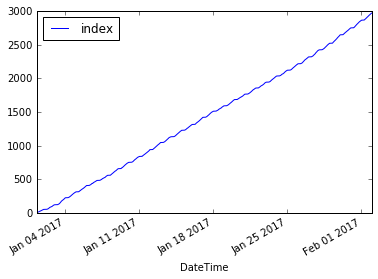

In [111]:
news.plot()

### Группа за день

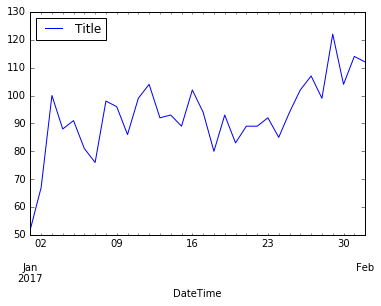

In [125]:
news.ix[:,:'Title'].groupby(pd.TimeGrouper('24H')).count().plot()

In [126]:
news.reset_index(inplace=True)

## Средний промежуток

In [129]:
firstdate = news.head(1).iloc[0]['DateTime']
lastdate = news.tail(1).iloc[0]['DateTime']
timedelta_between_updates = (lastdate-firstdate)/(news.shape[0] - 1)
timedelta_between_updates.value

920572005383L

In [130]:
timedelta_between_updates_in_seconds = timedelta_between_updates.value/float(10**9)
timedelta_between_updates_in_seconds

920.572005383

### Частота обновлений

In [131]:
frequency=1/timedelta_between_updates_in_seconds
frequency

0.0010862811318968519

In [132]:
news.to_csv('footballua_data.csv', encoding='utf-8')